In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import skew
%matplotlib inline

Import our class for pairwise mutual information in an alignment

In [2]:
from align_mi import AlignMI

Here are Andy's simulations:

In [3]:
ls ../simulation_study/preliminary/2_epistasis/

prop-0.25_d-0/  prop-0.5_d-0/   prop-0.75_d-0/  prop-0_d-1/     prop-1_d-5/
prop-0.25_d-1/  prop-0.5_d-1/   prop-0.75_d-1/  prop-1_d-0/
prop-0.25_d-10/ prop-0.5_d-10/  prop-0.75_d-10/ prop-1_d-1/
prop-0.25_d-2/  prop-0.5_d-2/   prop-0.75_d-2/  prop-1_d-10/
prop-0.25_d-5/  prop-0.5_d-5/   prop-0.75_d-5/  prop-1_d-2/


Load two of the simulations, one without epistasis, one with half of sites epistatic

In [6]:
mi = AlignMI('../simulation_study/preliminary/2_epistasis/prop-0_d-1/data/1.nex').mi.flatten()
mi = mi[~np.isnan(mi)]
mi_epi = AlignMI('../simulation_study/preliminary/2_epistasis/prop-0.5_d-10/data/1.nex').mi.flatten()
mi_epi = mi_epi[~np.isnan(mi_epi)]

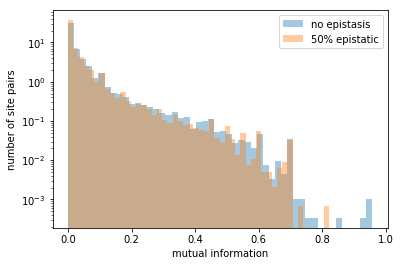

In [7]:
sns.distplot(mi, kde=False, label='no epistasis', norm_hist=True)
sns.distplot(mi_epi, kde=False, label='50% epistatic', norm_hist=True)
plt.yscale('log')
plt.xlabel('mutual information')
plt.ylabel('number of site pairs')
plt.legend()
plt.show()

In [8]:
skew(mi)

3.7092489651370264

In [9]:
skew(mi_epi)

3.9623313805645157

It seems funny that the there's a heavier tail for the no epistasis MIs.
Maybe these aren't so comparable in absolute terms though.

This is just one simulation for each case—maybe we need to look at more to see anything?
Here's a look at the MI skewness from 7 sims for each condition.
It's 7 because there were just 7 sims for the no epistasis case in Andy's data.

In [10]:
skew_noepi = []
skew_epi = []
for sim in range(1, 8):
    print(sim)
    mi = AlignMI('../simulation_study/preliminary/2_epistasis/prop-0_d-1/data/{}.nex'.format(sim)).mi.flatten()
    skew_noepi.append(skew(mi[~np.isnan(mi)]))
    mi = AlignMI('../simulation_study/preliminary/2_epistasis/prop-0.5_d-10/data/{}.nex'.format(sim)).mi.flatten()
    skew_epi.append(skew(mi[~np.isnan(mi)]))    

1
2
3
4
5
6
7


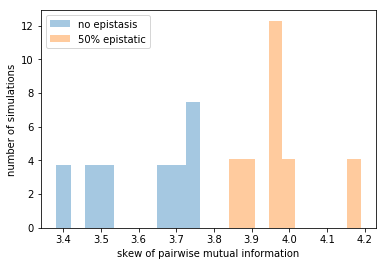

In [16]:
sns.distplot(skew_noepi, kde=False, label='no epistasis', bins=10, norm_hist=True)
sns.distplot(skew_epi, kde=False, label='50% epistatic', bins=10, norm_hist=True)
plt.xlabel('skew of pairwise mutual information')
plt.ylabel('number of simulations')
plt.legend()
plt.show()

Hey, those are pretty different!